<h2 id="data_acquisition">Data Acquisition</h2>

Data source: <a href="https://www.kaggle.com/kentonnlp/2014-new-york-city-taxi-trips">https://www.kaggle.com/kentonnlp/2014-new-york-city-taxi-trips</a>

Data type: csv

The Pandas Library is a useful tool that enables us to read various datasets into a data frame; Jupyter notebook platforms have a built-in Pandas Library.



In [ ]:
%run ./CaptureLogs.ipynb
logging = foo()

In [2]:
# import pandas library
import pandas as pd
# import numpy library
import numpy as np
# import matplotlib library
import matplotlib
import matplotlib.pyplot as plt

<h2 id="Read">Data Read</h2>

pandas.read_csv() function read the csv file.

In [3]:
# Read the online file and assign it to variable "df"    
    
logging.info('Reading file!')

try:
    other_path = "../Data/subsetTaxiTrip.csv"
    df = pd.read_csv(other_path)
except FileNotFoundError:
    logging.exception('File or path does not exist!')
else:
    logging.info('file readed!')

After reading the dataset, we can use the <code>dataframe.head(n)</code> method to check the top n rows of the dataframe; where n is an integer. Contrary to <code>dataframe.head(n)</code>, <code>dataframe.tail(n)</code> will show you the bottom n rows of the dataframe.

In [ ]:
# show the first 5 rows using dataframe.head() method
print("The first 5 rows of the dataframe") 
df.head(5)

In [ ]:
# show the last 5 rows using dataframe.tail() method
print("The last 5 rows of the dataframe") 
df.tail(5)

<h2 id="Data Types">Data Types</h2>

Data has a variety of types.
The main types stored in Pandas dataframes are object, float, int, bool and datetime64. In order to better learn about each attribute, it is always good for us to know the data type of each column. In Pandas:

In [ ]:
df.dtypes

<h2>Describe</h2>

Statistical summary of each column, such as column mean value, column standard deviation, etc.

In [ ]:
df.describe(include = "all")

In [ ]:
df.info

<h2>Data Wrangling</h2>

In [ ]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Based on the summary above, each column has 2150254 rows of data, seven columns containing missing data:
<ol>
    <li>"store_and_fwd_flag": 438670 missing data</li>
    <li>"dropoff_longitude": 17 missing data</li>
    <li>"dropoff_latitude": 17 missing data</li>
    <li>"tip_amount" : 1 missing data</li>
    <li>"tolls_amount": 1 missing data</li>
    <li>"total_amount": 1 missing data</li>
</ol>

Drop the whole row:

"dropoff_longitude", "dropoff_latitude": 17 missing data, simply delete the whole row
Reason: zone is what we want to get. Any data entry without coordinates data cannot be used for analysis

"tolls_amount", "total_amount": 1 missing data, , simply delete the whole row
Reason: price also we want to get. Any data entry without price data cannot be used for analysis

In [4]:
# simply drop whole row with NaN
df.dropna(subset=["dropoff_longitude"], axis=0, inplace=True)
df.dropna(subset=["dropoff_latitude"], axis=0, inplace=True)
df.dropna(subset=["tolls_amount"], axis=0, inplace=True)
df.dropna(subset=["total_amount"], axis=0, inplace=True)

# reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
missing_data = df.isnull()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

In [ ]:
df['store_and_fwd_flag'].value_counts()

N flag is the most common value, then missing values will be replaced with N.

In [5]:
#replace the missing 'store_and_fwd_flag' values by the most frequent 
df["store_and_fwd_flag"].replace(np.nan, "N", inplace=True)

In [6]:
df['store_and_fwd_flag'].value_counts()

N    2111855
Y      38381
Name: store_and_fwd_flag, dtype: int64

<h2>Remove Outliers</h2>

In [9]:
# city border
city_long_border = [-74.03, -73.77]
city_lat_border = [40.63, 40.85]

df = df[(df.pickup_longitude> city_long_border[0]) & (df.pickup_longitude < city_long_border[1])]
df = df[(df.dropoff_longitude> city_long_border[0]) & (df.dropoff_longitude < city_long_border[1])]
df = df[(df.pickup_latitude> city_lat_border[0]) & (df.pickup_latitude < city_lat_border[1])]
df = df[(df.dropoff_latitude> city_lat_border[0]) & (df.dropoff_latitude < city_lat_border[1])]

<h2>Identify zones</h2>

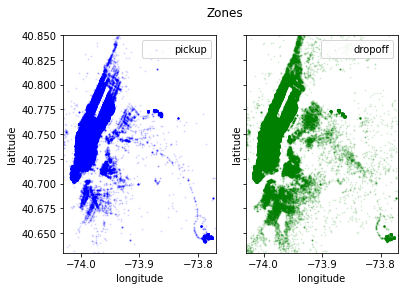

In [17]:
fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True)
ax[0].scatter(df['pickup_longitude'].values[:200000], df['pickup_latitude'].values[:200000],
              color='blue', s=1, label='pickup', alpha=0.1)
ax[1].scatter(df['dropoff_longitude'].values[:200000], df['dropoff_latitude'].values[:200000],
              color='green', s=1, label='dropoff', alpha=0.1)
fig.suptitle('Zones')
ax[0].legend(loc=0)
ax[0].set_ylabel('latitude')
ax[0].set_xlabel('longitude')
ax[1].set_ylabel('latitude')
ax[1].set_xlabel('longitude')
ax[1].legend(loc=0)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

<img src="../Data/NYmap.jpg" alt="NY map">

